# Data Loading & Imports

In [ ]:
import pandas as pd
from google.colab import drive
from matplotlib import pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/Shareddrives/Data Science Project 3 Team 3/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Extra settings

In [ ]:
# Removes column display limit
pd.set_option('display.max_columns', None)
# Makes the pyplot graphs big
plt.rcParams.update({'font.size': 24})
master_figsize = (24, 16)
# Default text color for pyplot
# plt.rcParams.update({"text.color": "#ffffff", "axes.labelcolor": "#ffffff"})

In [ ]:
df = pd.read_csv(drive_dir + "data/credit_card_dataset.csv")
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,0


# Data Cleaning & Formatting

Renaming columns to be more useful

In [ ]:
df.columns = ["id", "gender", "has_car", "has_property", "num_child", "salary", "income_type", "edu_type", "married_type", "property_type", "age_days", "days_employed", "has_cell", "has_work_phone", "has_house_phone", "has_email", "occupation", "num_fam_members", "card_status_months_ago", "card_status"]

Removing columns with too many values missing

In [ ]:
df = df.drop("occupation", axis=1)

Converting columns to the proper dtype

In [ ]:
df["salary"] = df["salary"].astype(int)
df["num_fam_members"] = df["num_fam_members"].astype(int)

Making values more intuitive

In [ ]:
df[["age_days", "days_employed", "card_status_months_ago"]] = df[["age_days", "days_employed", "card_status_months_ago"]].apply(lambda x: x * -1)

Label encoding

In [ ]:
df.head()

,id,gender,has_car,has_property,num_child,salary,income_type,edu_type,married_type,property_type,age_days,days_employed,has_cell,has_work_phone,has_house_phone,has_email,num_fam_members,card_status_months_ago,card_status
0,5008804,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,2,0,C
1,5008804,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,2,1,C
2,5008804,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,2,2,C
3,5008804,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,2,3,C
4,5008804,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,2,4,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      777715 non-null  int64 
 1   gender                  777715 non-null  object
 2   has_car                 777715 non-null  object
 3   has_property            777715 non-null  object
 4   num_child               777715 non-null  int64 
 5   salary                  777715 non-null  int64 
 6   income_type             777715 non-null  object
 7   edu_type                777715 non-null  object
 8   married_type            777715 non-null  object
 9   property_type           777715 non-null  object
 10  age_days                777715 non-null  int64 
 11  days_employed           777715 non-null  int64 
 12  has_cell                777715 non-null  int64 
 13  has_work_phone          777715 non-null  int64 
 14  has_house_phone         777715 non-n

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_object_list = df.select_dtypes(include = "object").columns
df[df_object_list] = df[df_object_list].apply(le.fit_transform)

# Data Overview

### Data description

Here is what each column represents::
- **id**: client number
- **gender**: gender of client
- **has_car**: does client own a car
- **has_property**: does client have property
- **num_child**: number of children client has
- **salary**: annual salary of client in dollars
- **income_type**: how client gets their income
- **edu_type**: highest level of education obtained by client
- **married_type**: marital status of client
- **property_type**: type of property client owns
- **age_days**: age of client in days
- **days_employed**: amount of days client has been employed (negative means they have been unemployed for the absolute value of that number. example: -46 means they have been unemployed for 46 days)
- **has_cell**: does client own a cell phone
- **has_work_phone**: does client own a work phone
- **has_house_phone**: does client have a house phone
- **has_email**: does client have an email address
- **num_fam_members**: number of family members in household (property)
- **card_status_months_ago**: (used with "**card_status**") the amount of months that have elapsed since the values in "**card_status**" have been obtained
- **card_status**: current status of credit card at month specified in "**card_status_months_ago**"

legend for "**card_status**" (make sure labels aren't encoded when viewing!):
- 0: 1-29 days past due
- 1: 30-59 days past due
- 2: 60-89 days overdue
- 3: 90-119 days overdue
- 4: 120-149 days overdue
- 5: Overdue or bad debts, write-offs for more than 150 days
- C: paid off that month
- X: No loan for the month

In [ ]:
df[df_object_list] = df[df_object_list].apply(le.inverse_transform)
df.head()

,id,gender,has_car,has_property,num_child,salary,income_type,edu_type,married_type,property_type,age_days,days_employed,has_cell,has_work_phone,has_house_phone,has_email,num_fam_members,card_status_months_ago,card_status
0,5008804,1,1,1,0,427500,4,1,0,4,12005,4542,1,1,0,0,2,0,C
1,5008804,1,1,1,0,427500,4,1,0,4,12005,4542,1,1,0,0,2,1,C
2,5008804,1,1,1,0,427500,4,1,0,4,12005,4542,1,1,0,0,2,2,C
3,5008804,1,1,1,0,427500,4,1,0,4,12005,4542,1,1,0,0,2,3,C
4,5008804,1,1,1,0,427500,4,1,0,4,12005,4542,1,1,0,0,2,4,C


# Data Exploration

In [ ]:
# change value of "0" to 0 if you think that less than a month of missing payment doesn't count as missing payments
df["MISSED_PAYMENT"] = df["card_status"].map({"0": 1, "1": 1, "2": 1, "3": 1, "4": 1, "5": 1, "C": 0, "X": 0})

In [ ]:
df.head()

,id,gender,has_car,has_property,num_child,salary,income_type,edu_type,married_type,property_type,age_days,days_employed,has_cell,has_work_phone,has_house_phone,has_email,num_fam_members,card_status_months_ago,card_status,MISSED_PAYMENT
0,5008804,1,1,1,0,427500,4,1,0,4,12005,4542,1,1,0,0,2,0,C,0
1,5008804,1,1,1,0,427500,4,1,0,4,12005,4542,1,1,0,0,2,1,C,0
2,5008804,1,1,1,0,427500,4,1,0,4,12005,4542,1,1,0,0,2,2,C,0
3,5008804,1,1,1,0,427500,4,1,0,4,12005,4542,1,1,0,0,2,3,C,0
4,5008804,1,1,1,0,427500,4,1,0,4,12005,4542,1,1,0,0,2,4,C,0


dfu containing one row per client (person)

In [ ]:
df[df_object_list] = df[df_object_list].apply(le.transform)
dfu = df.drop_duplicates("id")
dfu.reset_index(inplace = True, drop = True)

# Question: What factors determines a good/bad card owner?

Note: after making model, look at the outliers and see what makes them different

# Using groupby to acquire useful features

In [ ]:
gbid = df.groupby("id")
# num_entries = []
# for name, data in gbid:
#     num_entries.append(data.shape[0])

Creating summary features to describe each client (unique id) as our y value for model building

In [ ]:
summary_features_dict = {
    "id": [],
    "AMT_CARD_STATUS_ENTRIES": [],
    "PCT_PAYMENTS_MISSED": [],
    "MODE_CARD_STATUS": [],
    # "STATUS_": [],
}
for name, data in gbid:
    summary_features_dict["id"].append(name)
    summary_features_dict["AMT_CARD_STATUS_ENTRIES"].append(data.shape[0])
    summary_features_dict["PCT_PAYMENTS_MISSED"].append(data["MISSED_PAYMENT"].sum() / data.shape[0])
    summary_features_dict["MODE_CARD_STATUS"].append(data["card_status"].value_counts().idxmax())
df_summary = pd.DataFrame.from_dict(summary_features_dict)

Merging df_summary to dfu for extra features

In [ ]:
dfu = dfu.drop(["card_status_months_ago", "card_status", "MISSED_PAYMENT"], axis=1)
dfu = pd.merge(dfu, df_summary, on="id", how="inner")
dfu.head(3)

,id,gender,has_car,has_property,num_child,salary,income_type,edu_type,married_type,property_type,age_days,days_employed,has_cell,has_work_phone,has_house_phone,has_email,num_fam_members,AMT_CARD_STATUS_ENTRIES,PCT_PAYMENTS_MISSED,MODE_CARD_STATUS
0,5008804,1,1,1,0,427500,4,1,0,4,12005,4542,1,1,0,0,2,16,0.125000,6
1,5008805,1,1,1,0,427500,4,1,0,4,12005,4542,1,1,0,0,2,15,0.133333,6
2,5008806,1,1,1,0,112500,4,4,1,1,21474,1134,1,0,0,0,2,30,0.233333,7


Removing people who have less than 30% and more than 70% of payments missed (temp)

In [ ]:
dfu_30_70 = dfu[(dfu["PCT_PAYMENTS_MISSED"] >= .3) & (dfu["PCT_PAYMENTS_MISSED"] <= .7)]

In [ ]:
dfu["PCT_PAYMENTS_MISSED"].median()

0.45454545454545453

In [ ]:
dfu["PCT_PAYMENTS_MISSED_GTR_AVG"] = dfu["PCT_PAYMENTS_MISSED"] > dfu["PCT_PAYMENTS_MISSED"].median()

In [ ]:
dfu.head()

,id,gender,has_car,has_property,num_child,salary,income_type,edu_type,married_type,property_type,age_days,days_employed,has_cell,has_work_phone,has_house_phone,has_email,num_fam_members,AMT_CARD_STATUS_ENTRIES,PCT_PAYMENTS_MISSED,MODE_CARD_STATUS,PCT_PAYMENTS_MISSED_GTR_AVG
0,5008804,1,1,1,0,427500,4,1,0,4,12005,4542,1,1,0,0,2,16,0.125000,6,False
1,5008805,1,1,1,0,427500,4,1,0,4,12005,4542,1,1,0,0,2,15,0.133333,6,False
2,5008806,1,1,1,0,112500,4,4,1,1,21474,1134,1,0,0,0,2,30,0.233333,7,False
3,5008808,0,0,1,0,270000,0,4,3,1,19110,3051,1,0,1,1,1,5,0.400000,7,False
4,5008809,0,0,1,0,270000,0,4,3,1,19110,3051,1,0,1,1,1,5,0.000000,7,False


In [ ]:
dfu_entries = dfu[dfu["AMT_CARD_STATUS_ENTRIES"] > 6]

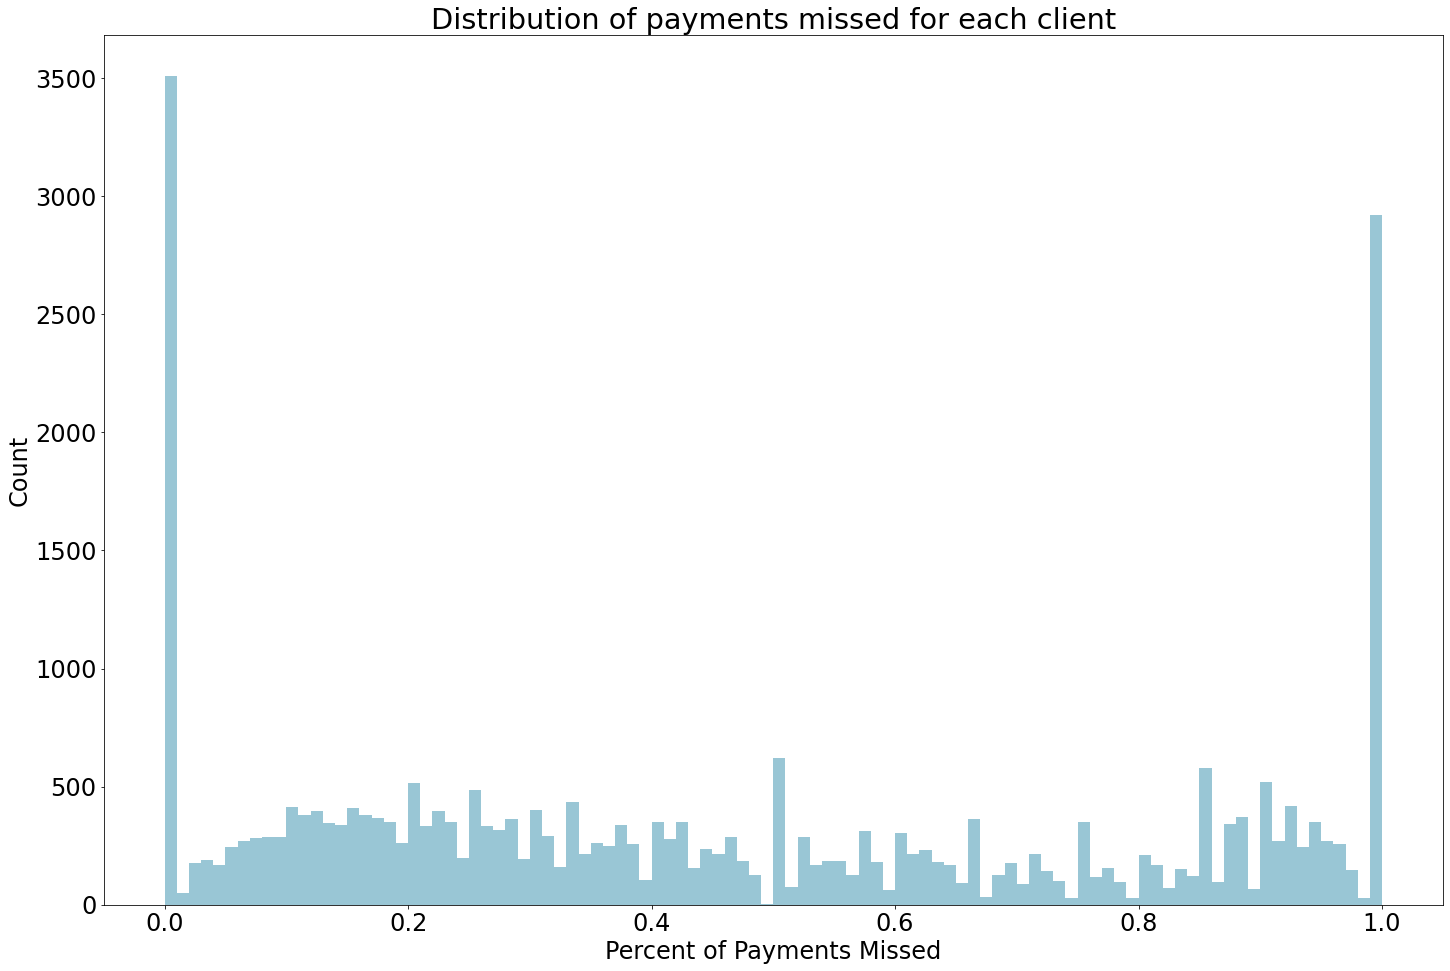

In [ ]:
fig, ax = plt.subplots(figsize=master_figsize)  # facecolor="#383838"
ax.hist(dfu_entries["PCT_PAYMENTS_MISSED"], 100, color="#99c6d5", alpha=1)
# ax.set_facecolor("#383838")
# ax.tick_params(axis="both", colors='#ffffff')
plt.ylabel("Count")
plt.xlabel("Percent of Payments Missed")
plt.title("Distribution of payments missed for each client");

In [ ]:
dfu_entries["MODE_CARD_STATUS"].unique()

array([6, 7, 0, 1, 5, 2])

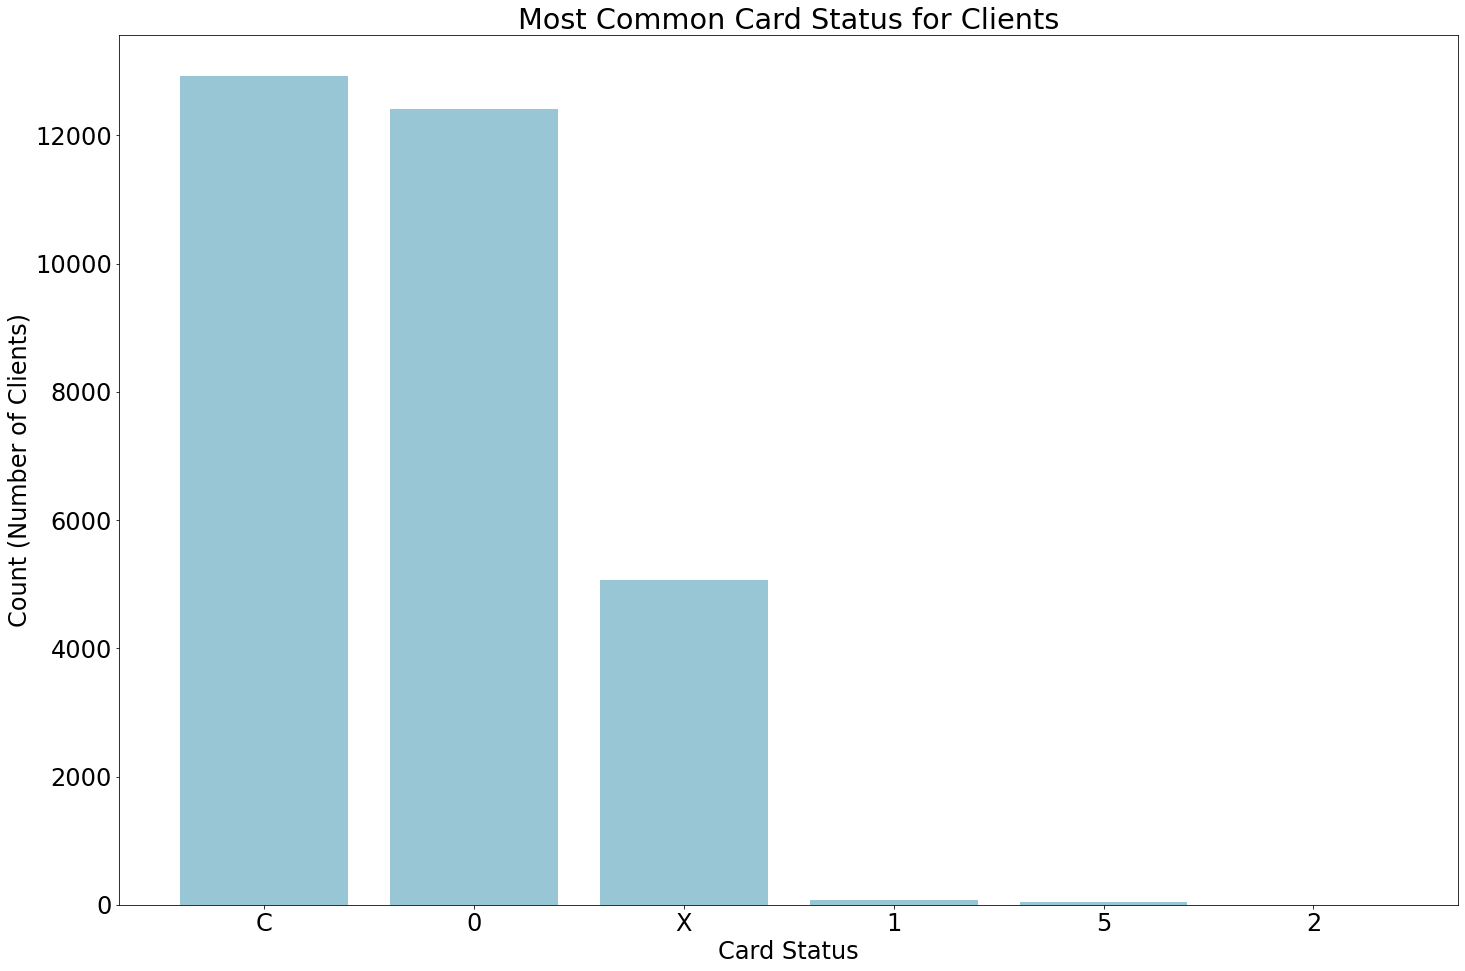

In [ ]:
fig, ax = plt.subplots(figsize=master_figsize)  # facecolor="#383838"
ax.bar(le.inverse_transform([x for x, height in dfu_entries["MODE_CARD_STATUS"].value_counts().iteritems()]), dfu_entries["MODE_CARD_STATUS"].value_counts(), color="#99c6d5", alpha=1)
plt.ylabel("Count (Number of Clients)")
plt.xlabel("Card Status")
plt.title("Most Common Card Status for Clients");

In [ ]:
# import numpy as np
# fig, ax = plt.subplots(figsize=master_figsize)
# ax.hist(num_entries, 60, color="#444444", alpha=1)
# ax.set_facecolor("#aaaaaa")
# plt.xticks(range(0, 65, 5), range(0, 65, 5))
# plt.title("Distribution of sdasofnaeotneoadojgoanaeonaoanoea")

# Defining X and y

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test_valid = train_test_split(dfu, train_size=0.6)
df_valid, df_test = train_test_split(df_test_valid, test_size=0.5)

X and y for regression

In [ ]:
dfu.head()

,id,gender,has_car,has_property,num_child,salary,income_type,edu_type,married_type,property_type,age_days,days_employed,has_cell,has_work_phone,has_house_phone,has_email,num_fam_members,AMT_CARD_STATUS_ENTRIES,PCT_PAYMENTS_MISSED,MODE_CARD_STATUS,PCT_PAYMENTS_MISSED_GTR_AVG
0,5008804,1,1,1,0,427500,4,1,0,4,12005,4542,1,1,0,0,2,16,0.125000,6,False
1,5008805,1,1,1,0,427500,4,1,0,4,12005,4542,1,1,0,0,2,15,0.133333,6,False
2,5008806,1,1,1,0,112500,4,4,1,1,21474,1134,1,0,0,0,2,30,0.233333,7,False
3,5008808,0,0,1,0,270000,0,4,3,1,19110,3051,1,0,1,1,1,5,0.400000,7,False
4,5008809,0,0,1,0,270000,0,4,3,1,19110,3051,1,0,1,1,1,5,0.000000,7,False


In [ ]:
yr = "PCT_PAYMENTS_MISSED"
Xr1 = df_train.drop([yr, "id"], axis=1).columns
Xr2 = ["salary", "property_type", "age_days", "days_employed", "has_email", "AMT_CARD_STATUS_ENTRIES", "MODE_CARD_STATUS", "PCT_PAYMENTS_MISSED_GTR_AVG"]
Xr = Xr2

Xr_train, yr_train = df_train[Xr], df_train[yr]
Xr_valid, yr_valid = df_valid[Xr], df_valid[yr]
Xr_test, yr_test = df_test[Xr], df_test[yr]

X and y for classification

In [ ]:
yc = "MODE_CARD_STATUS"
Xc1 = df_train.drop([yc, "id"], axis=1).columns
Xc2 = ["salary", "property_type", "age_days", "days_employed", "has_email", "AMT_CARD_STATUS_ENTRIES", "PCT_PAYMENTS_MISSED", "PCT_PAYMENTS_MISSED_GTR_AVG"]
Xc = Xc2

Xc_train, yc_train = df_train[Xc], df_train[yc]
Xc_valid, yc_valid = df_valid[Xc], df_valid[yc]
Xc_test, yc_test = df_test[Xc], df_test[yc]

# Modeling

Function for measuring regression performance

In [ ]:
def reg_report(reg1, Xt, yt, Xv, yv, reg2=None, reg3=None):
    fig, ax = plt.subplots(figsize=(16, 16))  # facecolor="#383838"
    # ax.set_facecolor("#99c6d5")  # "#383838"
    # ax.tick_params(axis="both", colors='#ffffff')

    reg1.fit(Xt, yt)
    plt.scatter(yv, reg1.predict(Xv), label="reg1", alpha=1, color="#99c6d5", s=8)
    reg1_r2 = f"{np.corrcoef(yv, reg1.predict(Xv))[0,1]**2:.3f}"

    reg2_r2 = 0
    if reg2 != None:
        reg2.fit(Xt, yt)
        plt.scatter(yv, reg2.predict(Xv), label="reg2", alpha=.5, color="#d599c6", s=8)
        reg2_r2 = f"{np.corrcoef(yv, reg2.predict(Xv))[0,1]**2:.3f}"
    
    reg3_r2 = 0
    if reg3 != None:
        reg3.fit(Xt, yt)
        plt.scatter(yv, reg3.predict(Xv), label="reg3", alpha=.5, color="#c6d599", s=8)
        reg3_r2 = f"{np.corrcoef(yv, reg3.predict(Xv))[0,1]**2:.3f}"

    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.title(f"Actual vs predicted: R^2: reg1={reg1_r2}, reg2={reg2_r2}, reg3={reg3_r2}");

Function for measuring classification performance

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def clf_report(clf, Xt, yt, Xv, yv, desc):
    clf.fit(Xt, yt)
    y_preds = clf.predict(Xt)
    print(classification_report(yt, y_preds))

    cm = confusion_matrix(yt, y_preds, normalize=None)  # {'true', 'pred', 'all', None}
    cm_disp = ConfusionMatrixDisplay(cm, display_labels=le.inverse_transform(clf.classes_))  # or use list of str
    fig, ax = plt.subplots(figsize=master_figsize)
    # ax.set_facecolor("#99c6d5")
    plt.title(f"CM 'MODE_CARD_STATUS' {desc}")
    cm_disp.plot(ax=ax, cmap="Blues", values_format="");

Making function to plot feature_importances_

In [ ]:
def plot_feat_imps(model, names, desc):
    fig, ax = plt.subplots(figsize=master_figsize)
    plt.bar(names, model.feature_importances_, color="#99c6d5")
    plt.title(f"Bar Graph for Feature Importances of {desc}")
    plt.xticks(rotation=75)
    plt.plot()

Testing baseline regressor models

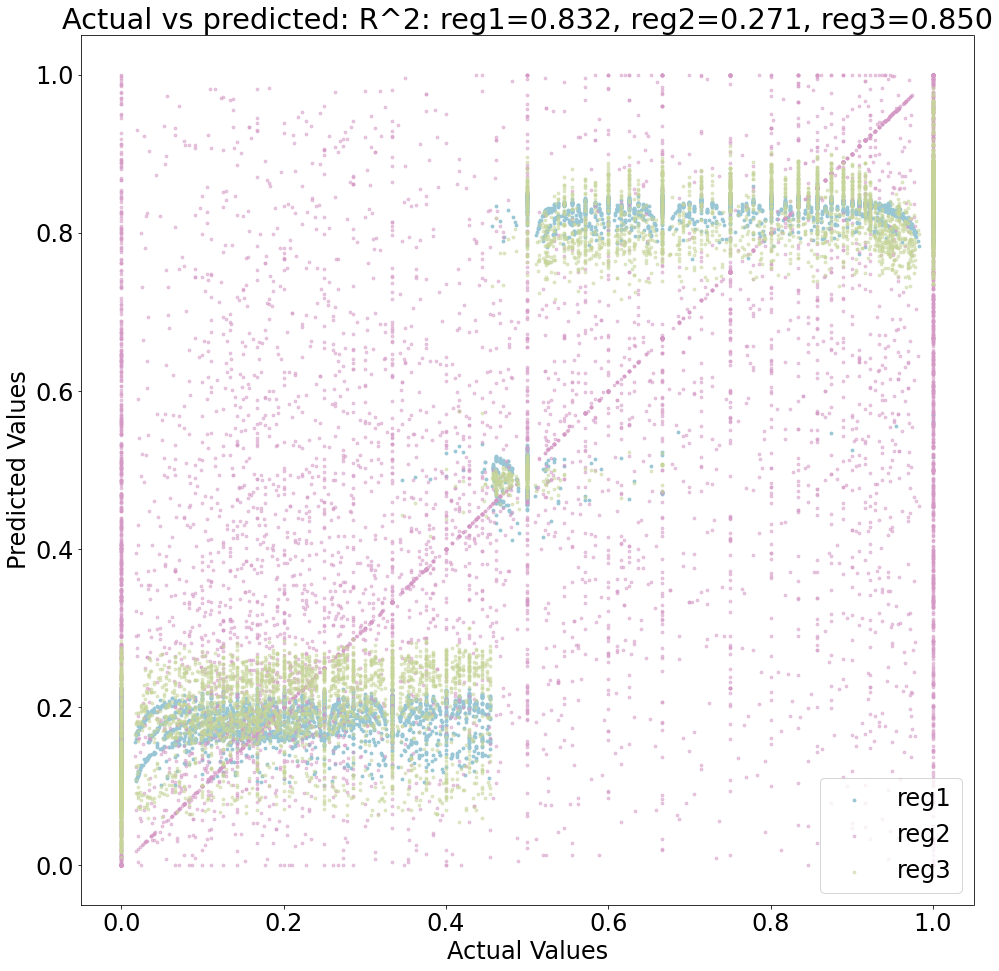

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
lr = LinearRegression()
knr = KNeighborsRegressor(n_neighbors=5, weights="distance")
rfr = RandomForestRegressor(min_samples_split=25, max_depth=100, min_samples_leaf=25, max_features=3, n_estimators=100, n_jobs=-1)
reg_report(lr, Xr_train, yr_train, Xr_valid, yr_valid, knr, rfr)

# Kneighbors Regressor GSCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# KNeighborsRegressor(algorithm='ball_tree', metric='manhattan', n_jobs=-1, p=1, weights='distance')
# KNeighborsRegressor(algorithm='ball_tree', leaf_size=20, metric='manhattan', n_jobs=-1, n_neighbors=10, p=1, weights='distance')
knr_params = {
    "n_neighbors": [10],  # default=5
    "weights": ["distance"],  # ["uniform", "distance"] default="uniform"
    "algorithm": ["ball_tree"],  # ["auto", "ball_tree", "kd_tree", "brute"] default="auto"
    "leaf_size": [20],  # default=30
    "p": [1],  # default=2
    "metric": ["manhattan"],  # ["euclidean", "manhattan", "chebyshev", "minkowski"] default="minkowski"
    "n_jobs": [-1]
}
knr_gscv = GridSearchCV(KNeighborsRegressor(), knr_params)
knr_gscv.fit(Xr_train, yr_train)
knr_gscv_df = pd.DataFrame(knr_gscv.cv_results_)
knr_best = knr_gscv.best_estimator_
knr_best

KNeighborsRegressor(algorithm='ball_tree', leaf_size=20, metric='manhattan',
                    n_jobs=-1, n_neighbors=10, p=1, weights='distance')

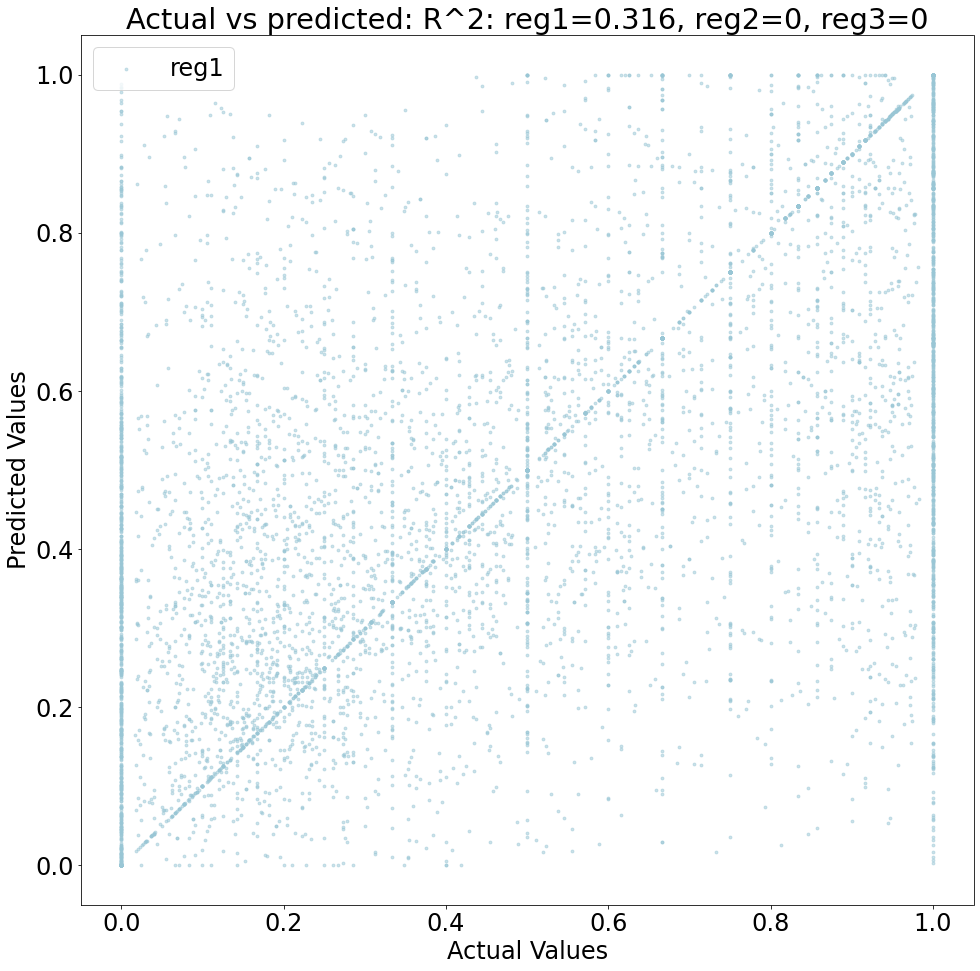

In [ ]:
reg_report(knr_best, Xr_train, yr_train, Xr_valid, yr_valid)

# Logistic Regression

In [ ]:
# from sklearn.linear_model import LogisticRegression
# logr = LogisticRegression()
# logr.fit(Xc_train, yc_train)
# probas = [x[0] for x in logr.predict_proba(Xc_valid)]

In [ ]:
# plt.scatter(probas, yr_valid, alpha=.1)

# Ensemble Regressor

In [ ]:
# GradientBoostingRegressor(criterion='squared_error', learning_rate=0.3, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=150, n_iter_no_change=3)
# GradientBoostingRegressor(criterion='squared_error', learning_rate=0.3, max_depth=4, min_samples_leaf=6, min_samples_split=5, n_estimators=150, n_iter_no_change=2, tol=0.001)
from sklearn.ensemble import GradientBoostingRegressor
gbr_params = {
    "loss": ["squared_error"],  # ["squared_error", "absolute_error", "huber", "quantile"] default="squared_error"
    "learning_rate": [.3],  # default=0.1
    "n_estimators": [150],  # default=100
    "criterion": ["squared_error"],  # ["friedman_mse", "squared_error"] default="friedman_mse"
    "min_samples_split" : [5],  # default=2
    "min_samples_leaf": [6],  # default=1
    "max_depth": [4],  # default=3
    "validation_fraction": [.1],  # default=0.1
    "n_iter_no_change": [2],  # default=None
    "tol": [1e-3],  # default=1e-4
    "verbose": [0],  # default=0
}
gbr_gscv = GridSearchCV(GradientBoostingRegressor(), gbr_params)
gbr_gscv.fit(Xr_train, yr_train)
gbr_gscv_df = pd.DataFrame(gbr_gscv.cv_results_)
gbr_best = gbr_gscv.best_estimator_
gbr_best

GradientBoostingRegressor(criterion='squared_error', learning_rate=0.3,
                          max_depth=4, min_samples_leaf=6, min_samples_split=5,
                          n_estimators=150, n_iter_no_change=2, tol=0.001)

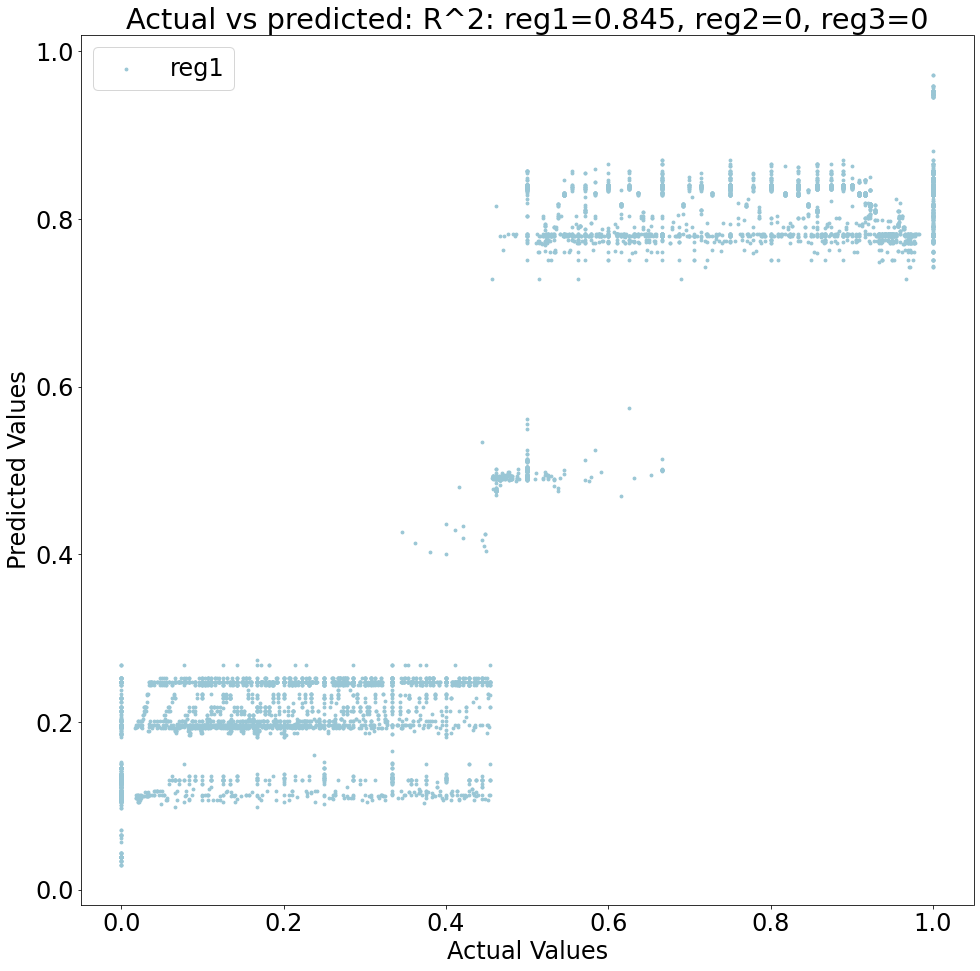

In [ ]:
reg_report(gbr_best, Xr_train, yr_train, Xr_valid, yr_valid)  # valid set

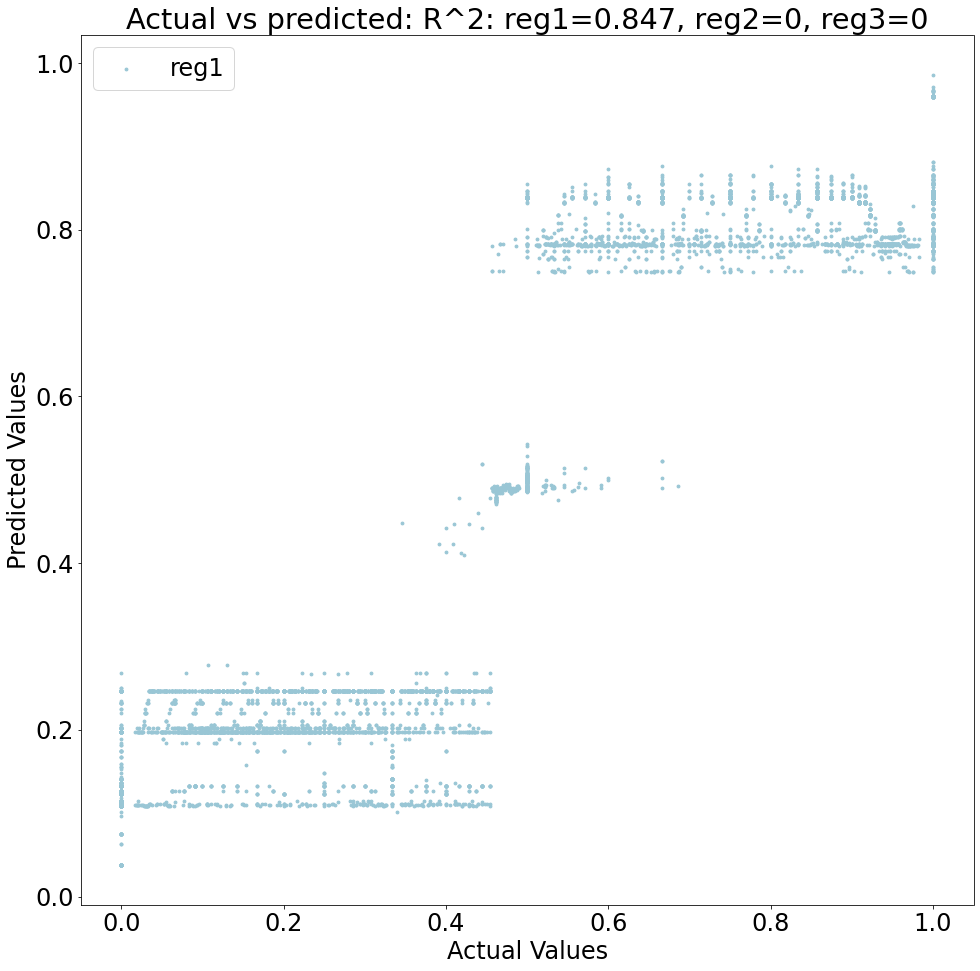

In [ ]:
reg_report(gbr_best, Xr_train, yr_train, Xr_test, yr_test)  # test set

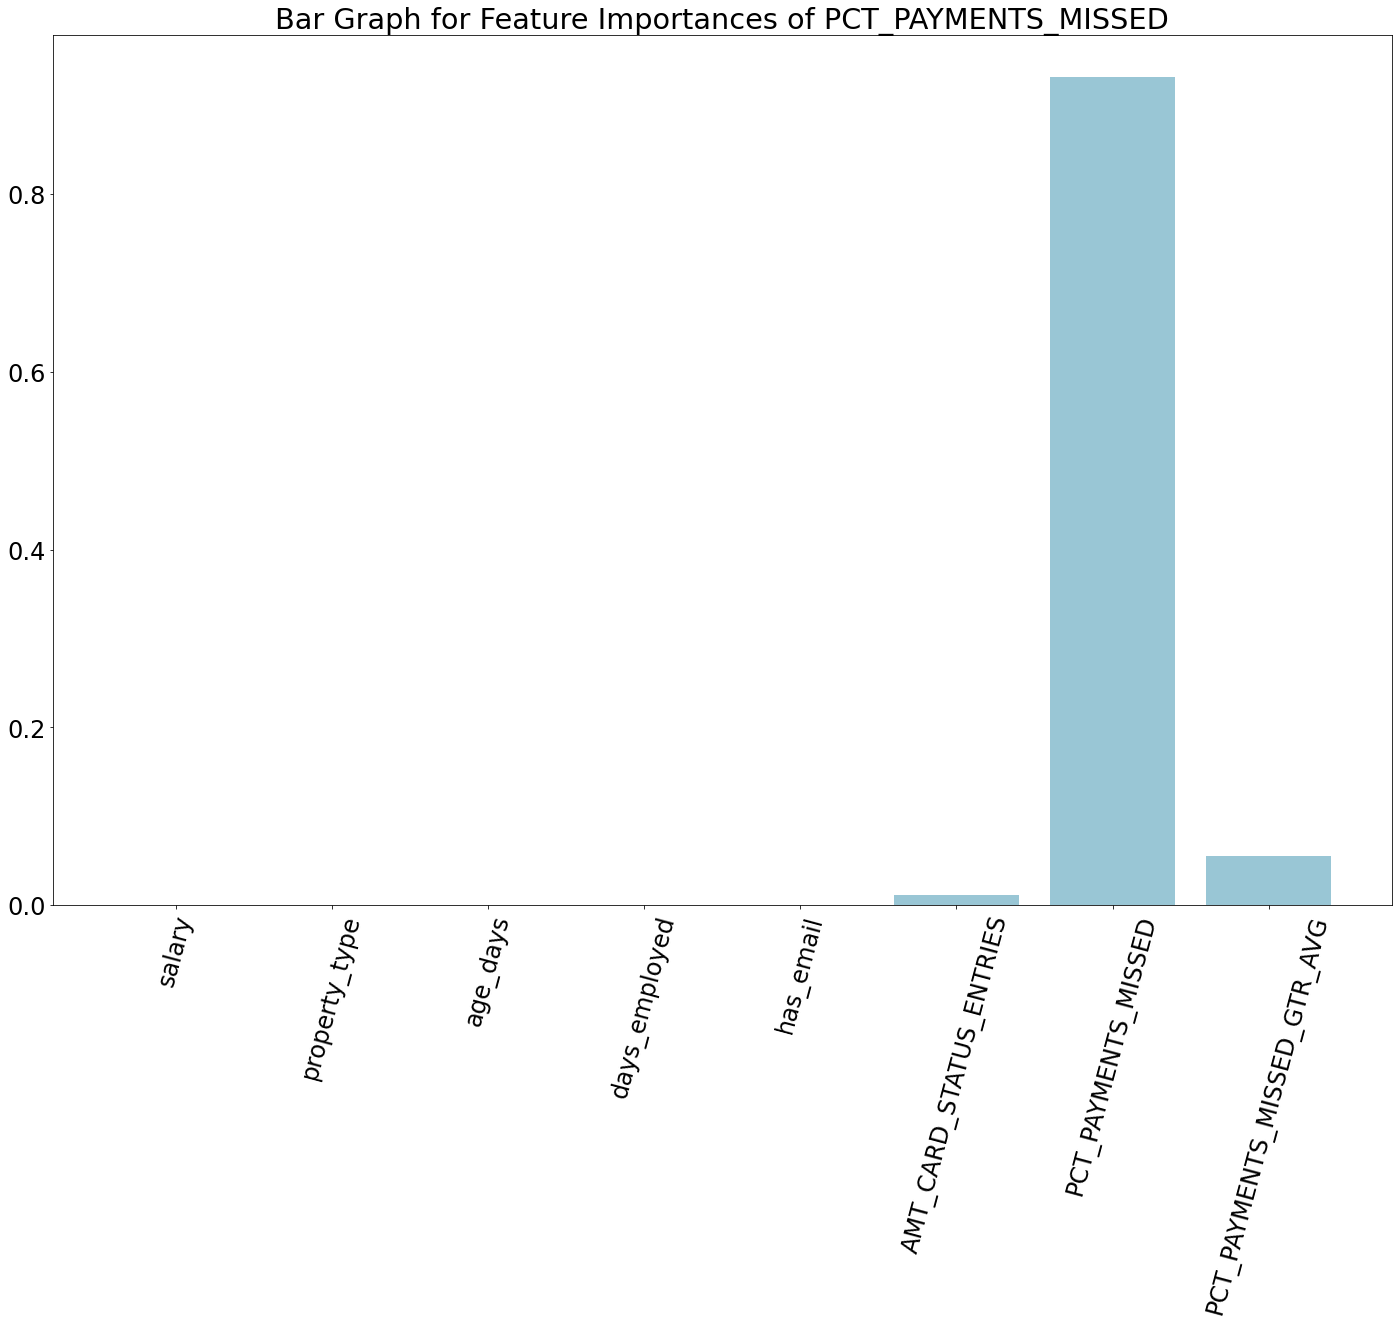

In [ ]:
plot_feat_imps(gbr_best, Xc_train.columns, yr)

# Ensemble Classifier

In [ ]:
yc_train.value_counts()

0    9858
6    7970
7    3943
1      65
5      35
2       3
Name: MODE_CARD_STATUS, dtype: int64

In [ ]:
# GradientBoostingClassifier(criterion='squared_error', learning_rate=0.2, max_depth=2, min_samples_leaf=9, min_samples_split=9, n_estimators=200, n_iter_no_change=3)
# GradientBoostingClassifier(criterion='squared_error', learning_rate=0.2, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=150, n_iter_no_change=3)
# GradientBoostingClassifier(criterion='squared_error', learning_rate=0.2, max_depth=2, min_samples_leaf=8, min_samples_split=7, n_estimators=200, n_iter_no_change=3)
# GradientBoostingClassifier(criterion='squared_error', learning_rate=0.2,              min_samples_leaf=7, min_samples_split=7, n_estimators=200, n_iter_no_change=2)
# GradientBoostingClassifier(criterion='squared_error', learning_rate=0.3,              min_samples_leaf=7, min_samples_split=7, n_estimators=150, n_iter_no_change=2, tol=0.001)
from sklearn.ensemble import GradientBoostingClassifier
gbc_params = {
    "loss": ["deviance"],  # ["deviance", "exponential"] default="deviance"
    "learning_rate": [.3],  # default=0.1
    "n_estimators": [150],  # default=100
    "criterion": ["squared_error"],  # ["friedman_mse", "squared_error"] default="friedman_mse"
    "min_samples_split" : [7],  # default=2
    "min_samples_leaf": [7],  # default=1
    "max_depth": [3],  # default=3
    "validation_fraction": [.1],  # default=0.1
    "n_iter_no_change": [2],  # default=None
    "tol": [1e-3],  # default=1e-4
    "verbose": [0],  # default=0
}
gbc_gscv = GridSearchCV(GradientBoostingClassifier(), gbc_params)
gbc_gscv.fit(Xc_train, yc_train)
gbc_gscv_df = pd.DataFrame(gbc_gscv.cv_results_)
gbc_best = gbc_gscv.best_estimator_
gbc_best

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


GradientBoostingClassifier(criterion='squared_error', learning_rate=0.3,
                           min_samples_leaf=7, min_samples_split=7,
                           n_estimators=150, n_iter_no_change=2, tol=0.001)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      9858
           1       0.16      0.05      0.07        65
           2       0.20      0.67      0.31         3
           5       0.17      0.11      0.14        35
           6       0.83      0.90      0.87      7970
           7       0.76      0.67      0.71      3943

    accuracy                           0.88     21874
   macro avg       0.52      0.56      0.51     21874
weighted avg       0.88      0.88      0.88     21874



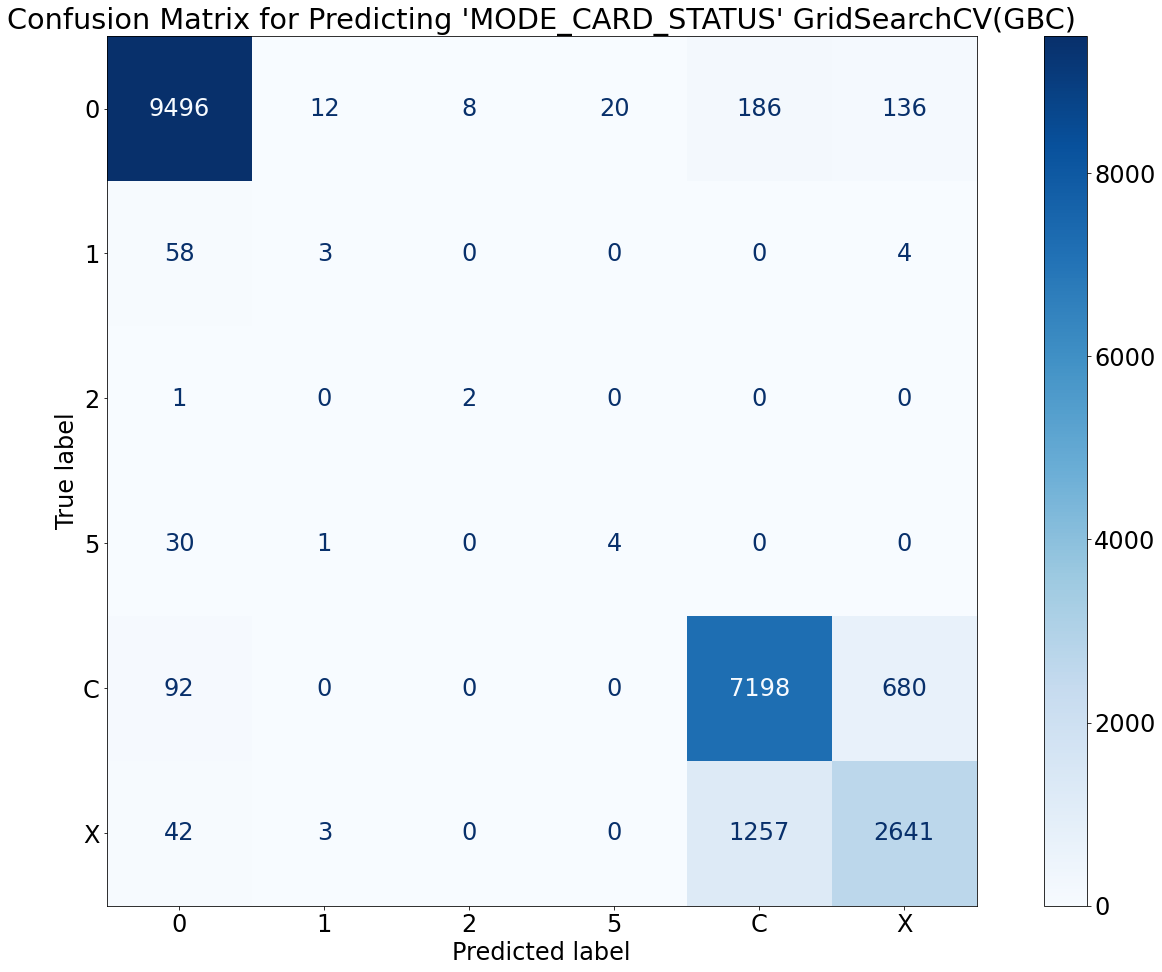

In [ ]:
clf_report(gbc_best, Xc_train, yc_train, Xc_valid, yc_valid, "GridSearchCV(GBC)")

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.98      0.97      0.97      9858
           1       0.00      0.00      0.00        65
           2       1.00      0.33      0.50         3
           5       0.24      0.14      0.18        35
           6       0.84      0.90      0.87      7970
           7       0.75      0.68      0.71      3943

    accuracy                           0.88     21874
   macro avg       0.63      0.50      0.54     21874
weighted avg       0.88      0.88      0.88     21874



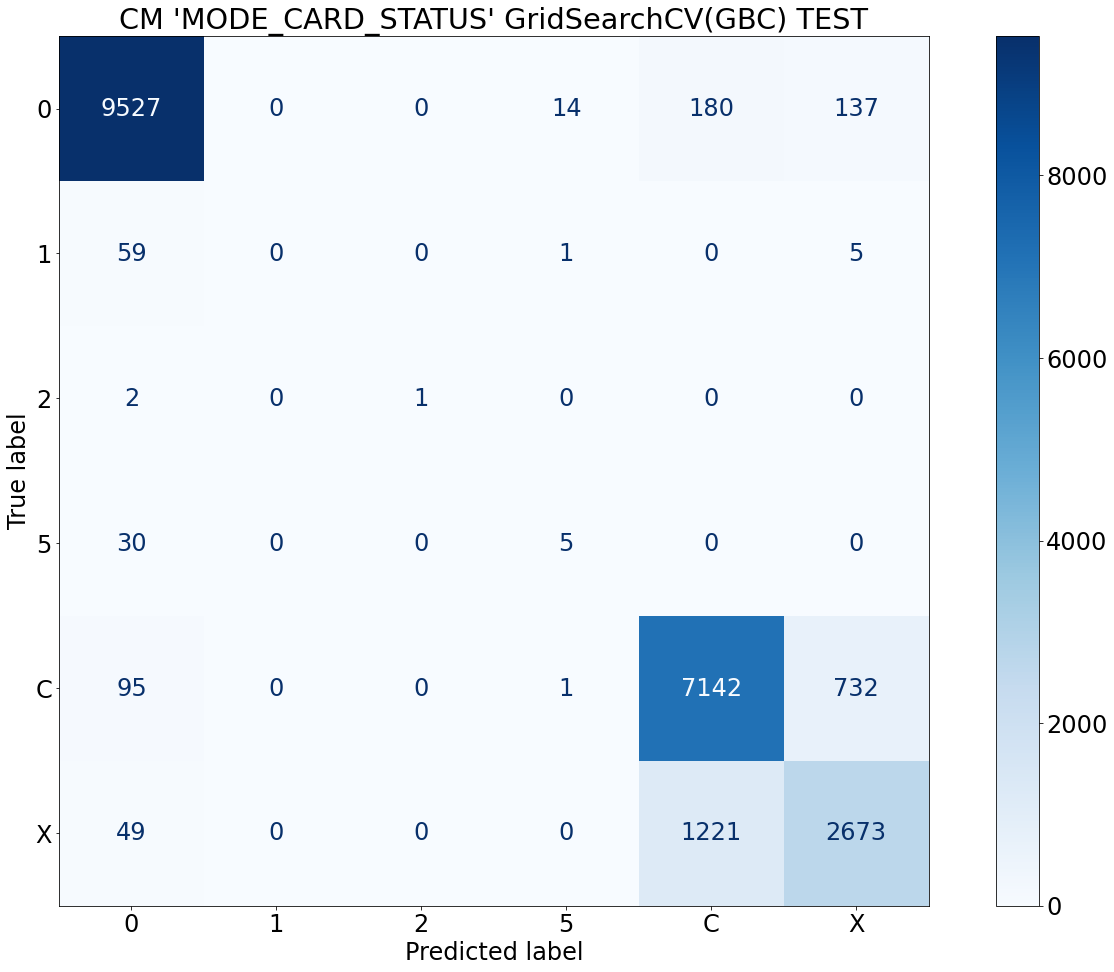

In [ ]:
clf_report(gbc_best, Xc_train, yc_train, Xc_test, yc_test, "GridSearchCV(GBC) TEST")

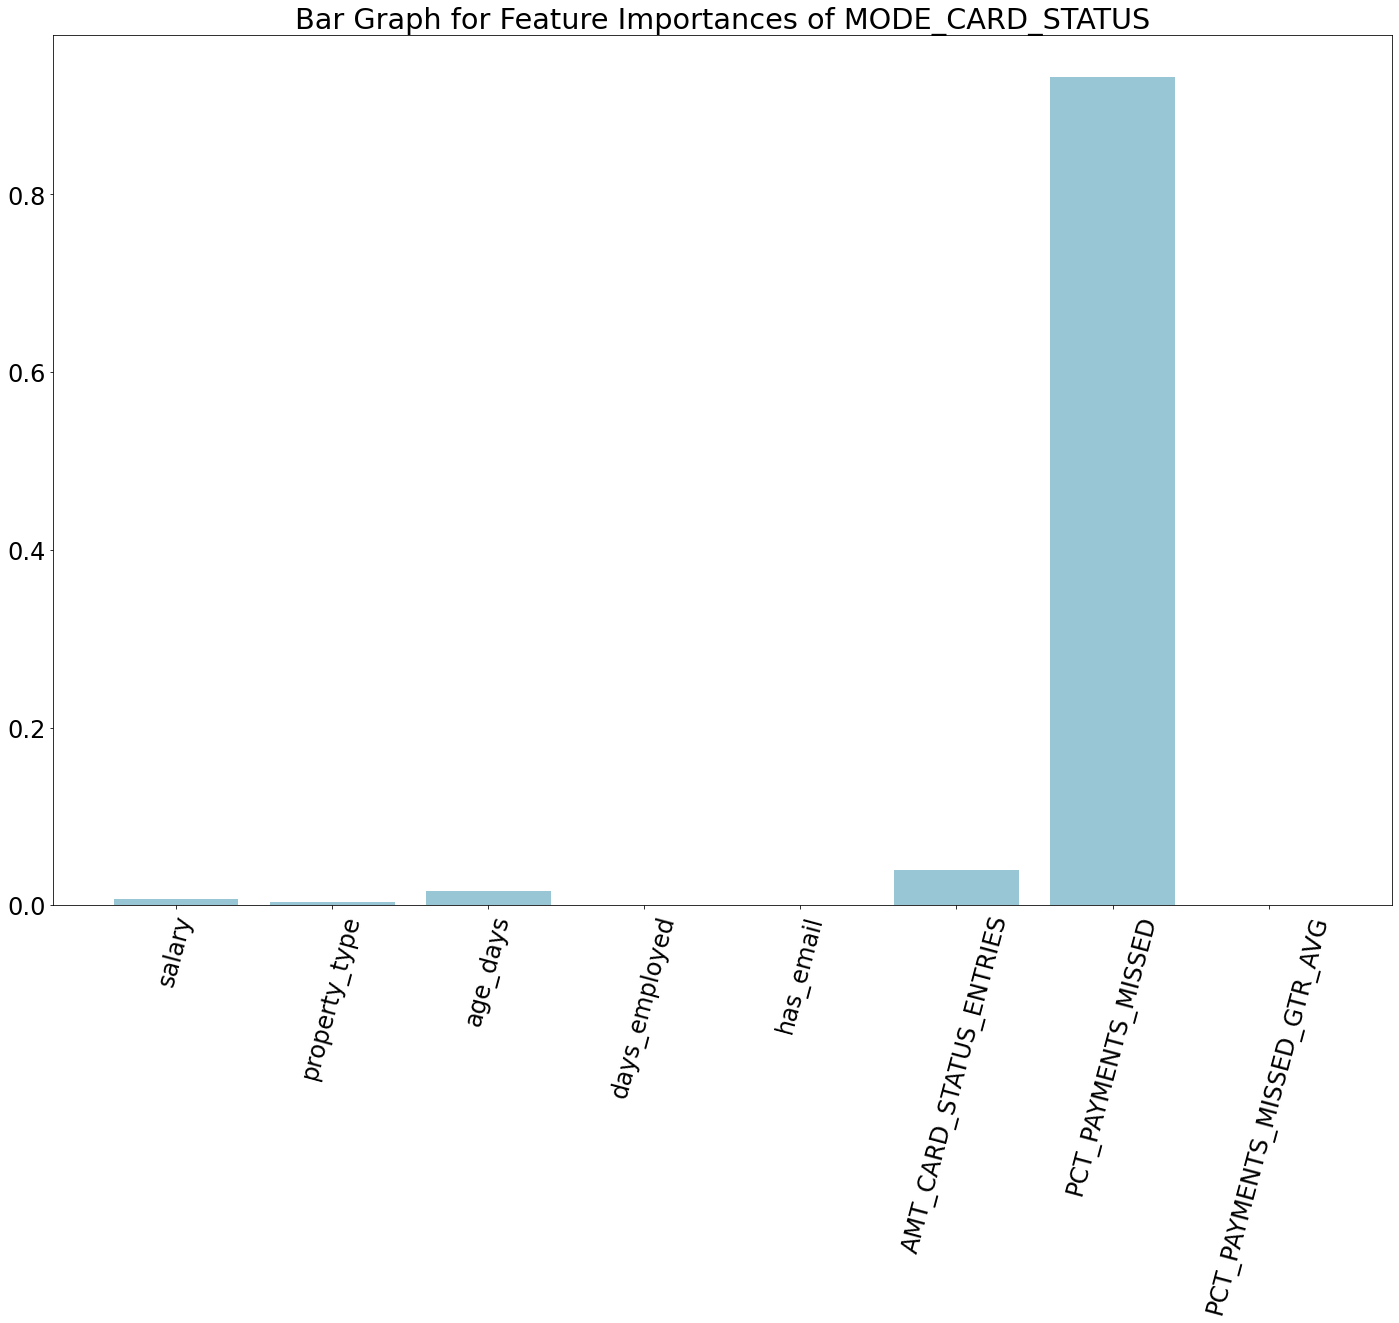

In [ ]:
plot_feat_imps(gbc_best, Xc_train.columns, yc)

# Marci Thingy

In [ ]:
# df = df.dropna(how="any")

In [ ]:
# from sklearn.model_selection import train_test_split
# df_train, df_test_valid = train_test_split(df, train_size=0.6)
# df_valid, df_test = train_test_split(df_test_valid, test_size=0.5)

# y = "is_bad_card_owner"
# X = df.drop([y, "card_status"], axis=1).columns

# X_train, y_train = df_train[X], df_train[y]
# X_valid, y_valid = df_valid[X], df_valid[y]
# X_test, y_test = df_test[X], df_test[y]

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV

In [ ]:
# dtc = DecisionTreeClassifier()
# dtc.fit(X_train, y_train)
# gcsv_dtc = GridSearchCV(dtc, {'min_samples_split': np.arange(1, 10, 2), 'max_depth': np.arange(1, 10, 2), 'min_samples_leaf': np.arange(1, 10, 2)})
# gcsv_dtc.fit(X_train, y_train)
# df_gscv_dtc = pd.DataFrame(gcsv_dtc.cv_results_)
# df_gscv_dtc

In [ ]:
# df.to_csv(drive_dir + "data/df_gscv_dtc.csv", index=False)

In [ ]:
# knc = KNeighborsClassifier()
# knc.fit(X_train, y_train)
# gcsv_knc = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': range(1, 10, 2), 'metric': ['hamming', 'canberra', 'braycurtis']})
# gcsv_knc.fit(X_train, y_train)
# df_gscv_knc = pd.DataFrame(gcsv_knc.cv_results_)
# df_gscv_knc

In [ ]:
# df.to_csv(drive_dir + "data/df_gscv_knc.csv", index=False)